Jupyter Lab tutorial: https://www.youtube.com/watch?v=A5YyoCKxEOU

Cheatsheet: https://cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/

In [197]:
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
# from datetime import date, datetime, timedelta
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split, cross_val_score

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = None # show all columns of the dat 

In [198]:
# Read from csv:
df_original = pd.read_csv('churn_prediction_customer.csv', sep=',')
df_original.head()

,#,is_tester,customer_id,customer_is_fleet,customer_country,customer_status,first_subscription_start_dt,max_subscription_cancelled_dt,reference_dt,subscription_length_36_mths,subscription_length_12_mths,subscription_length_1_mths,billing_every_12_mths,billing_every_6_mths,billing_every_3_mths,billing_every_1_mths,has_discount,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_other
0,1,False,10026175,True,DE,active,2017-01-31,NaN,2021-12-07,NaN,True,NaN,True,NaN,NaN,NaN,True,42.93,42.93,NaN,NaN,NaN,NaN
1,2,False,10052946,True,DE,non_renewing,2017-11-09,2020-10-13,2020-10-13,NaN,True,NaN,True,NaN,NaN,NaN,NaN,31.80,31.80,NaN,NaN,NaN,NaN
2,3,False,10229552,True,DE,non_renewing,2017-01-01,2021-08-26,2021-08-26,NaN,True,NaN,True,NaN,NaN,NaN,True,40.55,40.55,NaN,NaN,NaN,NaN
3,4,False,10270919,True,DE,active,2018-01-01,2018-03-05,2018-03-05,NaN,True,NaN,True,NaN,NaN,NaN,True,57.24,57.24,NaN,NaN,NaN,NaN
4,5,False,10334328,True,DE,active,2017-06-06,NaN,2021-12-07,NaN,True,NaN,True,NaN,NaN,NaN,True,35.45,13.52,NaN,21.93,NaN,NaN


In [199]:
f'Dataset has {df_original.shape[0]} rows and {df_original.shape[1]} columns.'

'Dataset has 8163 rows and 23 columns.'

In [200]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   #                              8163 non-null   int64  
 1   is_tester                      8163 non-null   bool   
 2   customer_id                    8163 non-null   object 
 3   customer_is_fleet              8163 non-null   bool   
 4   customer_country               8163 non-null   object 
 5   customer_status                8163 non-null   object 
 6   first_subscription_start_dt    8163 non-null   object 
 7   max_subscription_cancelled_dt  1742 non-null   object 
 8   reference_dt                   8163 non-null   object 
 9   subscription_length_36_mths    1534 non-null   object 
 10  subscription_length_12_mths    6503 non-null   object 
 11  subscription_length_1_mths     132 non-null    object 
 12  billing_every_12_mths          7433 non-null   o

In [201]:
df = df_original.copy()

In [202]:
# Objects: some fields have only True and null values
cols_to_bool = [col for col in df.columns if 'mth' in col]
other_bool_cols = ['has_discount', 'is_tester', 'customer_is_fleet']
cols_to_bool = cols_to_bool + other_bool_cols

for col in cols_to_bool:
    df[col].fillna(0, inplace=True)
    df[col].replace({True:1, False:0}, inplace=True)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   #                              8163 non-null   int64  
 1   is_tester                      8163 non-null   int64  
 2   customer_id                    8163 non-null   object 
 3   customer_is_fleet              8163 non-null   int64  
 4   customer_country               8163 non-null   object 
 5   customer_status                8163 non-null   object 
 6   first_subscription_start_dt    8163 non-null   object 
 7   max_subscription_cancelled_dt  1742 non-null   object 
 8   reference_dt                   8163 non-null   object 
 9   subscription_length_36_mths    8163 non-null   int64  
 10  subscription_length_12_mths    8163 non-null   int64  
 11  subscription_length_1_mths     8163 non-null   int64  
 12  billing_every_12_mths          8163 non-null   i

In [147]:
# Change data types (if needed):
# Numeric:
cols_to_num = ['mrr','mrr_logbook','mrr_admin', 'mrr_geo','mrr_pro','mrr_other']

for col in cols_to_num:
    df[col] = pd.to_numeric(df[col])
    df[col] = df[col].fillna(0) # Replace NaN with 0
        
# Dates:
cols_to_date = ['first_subscription_start_dt', 'max_subscription_cancelled_dt', 'reference_dt']

for col in cols_to_date:
    df[col] = pd.to_datetime(df[col])
        

In [149]:
# Unique values in customer_status:
print(df['customer_status'].unique())
df['customer_status'].nunique()

['active' 'non_renewing' 'cancelled' 'future']


4

In [150]:
# Rename columns:
df = df.rename(columns={"max_subscription_cancelled_dt": "cancelled_dt",
                        "has_discount": "discount"})

#### Drop columns which have only 1 unique value OR all values are unique:

In [174]:
# Drop columns which have only 1 unique value OR all values are unique
columns_to_drop = []

for col in df.columns:
    if df[col].nunique() in (1, df.shape[0]):
        columns_to_drop.append(col)
        
columns_to_drop        

df.drop(columns_to_drop, axis=1, inplace=True)

In [295]:
# Which columns have Nulls:
df.isna().any()

#                                False
is_tester                        False
customer_id                      False
customer_is_fleet                False
customer_country                 False
customer_status                  False
first_subscription_start_dt      False
max_subscription_cancelled_dt     True
reference_dt                     False
subscription_length_36_mths      False
subscription_length_12_mths      False
subscription_length_1_mths       False
billing_every_12_mths            False
billing_every_6_mths             False
billing_every_3_mths             False
billing_every_1_mths             False
has_discount                     False
mrr                              False
mrr_logbook                       True
mrr_admin                         True
mrr_geo                           True
mrr_pro                           True
mrr_other                         True
dtype: bool

#### Create additional columns:

In [168]:
# Create product columns:
df['logbook'] = np.where(df['mrr_logbook'] > 0, 1, 0)
df['admin']   = np.where(df['mrr_admin'] > 0, 1, 0)
df['geo']     = np.where(df['mrr_geo'] > 0, 1, 0)
df['pro']     = np.where(df['mrr_pro'] > 0, 1, 0)
df['other']   = np.where(df['mrr_other'] > 0, 1, 0)


# Create additional columns:
df['churned'] = np.where(df['cancelled_dt'].isna(), 0, 1)

df.head()

,is_tester,customer_country,customer_status,first_subscription_start_dt,cancelled_dt,reference_dt,subscription_length_36_mths,subscription_length_12_mths,subscription_length_1_mths,billing_every_12_mths,billing_every_3_mths,billing_every_1_mths,discount,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_other,churned,logbook,admin,geo,pro,other,days_retained
0,0,DE,active,2017-01-31,NaT,2021-12-07,0,1,0,1,0,0,1,42.93,42.93,0.0,0.00,0.0,0.0,0,1,0,0,0,0,1773
1,0,DE,non_renewing,2017-11-09,2020-10-13,2020-10-13,0,1,0,1,0,0,0,31.80,31.80,0.0,0.00,0.0,0.0,1,1,0,0,0,0,1069
2,0,DE,non_renewing,2017-01-01,2021-08-26,2021-08-26,0,1,0,1,0,0,1,40.55,40.55,0.0,0.00,0.0,0.0,1,1,0,0,0,0,1698
3,0,DE,active,2018-01-01,2018-03-05,2018-03-05,0,1,0,1,0,0,1,57.24,57.24,0.0,0.00,0.0,0.0,1,1,0,0,0,0,63
4,0,DE,active,2017-06-06,NaT,2021-12-07,0,1,0,1,0,0,1,35.45,13.52,0.0,21.93,0.0,0.0,0,1,0,1,0,0,1647


#### Create funcion calculating customer's days with Vimcar:

In [165]:
today = pd.to_datetime("today").normalize() #normalize is converting time to fixed 00:00:00

def days_with_vimcar(row):
    if row['churned'] == True and (row['cancelled_dt'] < row['first_subscription_start_dt']):
        return 0
    elif row['churned'] == True:
        return (row['cancelled_dt'] - row['first_subscription_start_dt']).days
    else:
        today = pd.to_datetime("today").normalize() #normalize is converting time to fixed 00:00:00
        return (today - row['first_subscription_start_dt']).days
        

In [166]:
# Test if calculates correctly:
df.apply (lambda row: days_with_vimcar(row), axis=1)  # applied to each row

0       1773
1       1069
2       1698
3         63
4       1647
        ... 
8158       8
8159       0
8160      17
8161       0
8162      73
Length: 8163, dtype: int64

In [167]:
# If the function output is correct then assign it to new column:
df['days_retained'] = df.apply (lambda row: days_with_vimcar(row), axis=1)
df['days_retained'].describe()

count    8163.000000
mean      630.554576
std       515.099484
min       -22.000000
25%       197.000000
50%       514.000000
75%       993.000000
max      2534.000000
Name: days_retained, dtype: float64

In [169]:
# There are subscription which apparently start in the future (negative days_retained):
df[df['days_retained'] == df['days_retained'].min()]

,is_tester,customer_country,customer_status,first_subscription_start_dt,cancelled_dt,reference_dt,subscription_length_36_mths,subscription_length_12_mths,subscription_length_1_mths,billing_every_12_mths,billing_every_3_mths,billing_every_1_mths,discount,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_other,churned,logbook,admin,geo,pro,other,days_retained
1871,0,DE,future,2021-12-31,NaT,2021-12-07,0,1,0,1,0,0,1,33.83,33.83,0.00,0.0,0.0,0.00,0,1,0,0,0,0,-22
2305,0,DE,active,2021-12-31,NaT,2021-12-07,0,1,0,1,0,0,0,19.90,19.90,0.00,0.0,0.0,0.00,0,1,0,0,0,0,-22
2366,0,DE,active,2021-12-31,NaT,2021-12-07,1,0,0,1,0,0,0,99.50,99.50,0.00,0.0,0.0,0.00,0,1,0,0,0,0,-22
3279,0,DE,active,2021-12-31,NaT,2021-12-07,0,1,0,1,0,0,0,19.90,19.90,0.00,0.0,0.0,0.00,0,1,0,0,0,0,-22
3841,0,DE,active,2021-12-31,NaT,2021-12-07,0,1,0,1,0,0,0,1343.48,0.00,707.86,0.0,0.0,635.62,0,0,1,0,0,1,-22


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   is_tester                    8163 non-null   int64         
 1   customer_country             8163 non-null   object        
 2   customer_status              8163 non-null   object        
 3   first_subscription_start_dt  8163 non-null   datetime64[ns]
 4   cancelled_dt                 1742 non-null   datetime64[ns]
 5   reference_dt                 8163 non-null   datetime64[ns]
 6   subscription_length_36_mths  8163 non-null   int64         
 7   subscription_length_12_mths  8163 non-null   int64         
 8   subscription_length_1_mths   8163 non-null   int64         
 9   billing_every_12_mths        8163 non-null   int64         
 10  billing_every_3_mths         8163 non-null   int64         
 11  billing_every_1_mths         8163 non-null 

#### Convert object columns into Categories:

In [300]:
# This is necessary if we want to build a decision tree.
df['customer_country'] = df['customer_country'].astype('category')
df['customer_status'] = df['customer_status'].astype('category')
df['customer_status'].dtypes

CategoricalDtype(categories=['active', 'cancelled', 'future', 'non_renewing'], ordered=False)

#### Create category codes:

In [304]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df.head()

,#,is_tester,customer_id,customer_is_fleet,customer_country,customer_status,first_subscription_start_dt,max_subscription_cancelled_dt,reference_dt,subscription_length_36_mths,subscription_length_12_mths,subscription_length_1_mths,billing_every_12_mths,billing_every_6_mths,billing_every_3_mths,billing_every_1_mths,has_discount,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_other
0,1,0,10026175,1,2,0,2017-01-31,NaN,2021-12-07,0,1,0,1,0.0,0,0,1,42.93,42.93,NaN,NaN,NaN,NaN
1,2,0,10052946,1,2,3,2017-11-09,2020-10-13,2020-10-13,0,1,0,1,0.0,0,0,0,31.80,31.80,NaN,NaN,NaN,NaN
2,3,0,10229552,1,2,3,2017-01-01,2021-08-26,2021-08-26,0,1,0,1,0.0,0,0,1,40.55,40.55,NaN,NaN,NaN,NaN
3,4,0,10270919,1,2,0,2018-01-01,2018-03-05,2018-03-05,0,1,0,1,0.0,0,0,1,57.24,57.24,NaN,NaN,NaN,NaN
4,5,0,10334328,1,2,0,2017-06-06,NaN,2021-12-07,0,1,0,1,0.0,0,0,1,35.45,13.52,NaN,21.93,NaN,NaN


# EDA

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='churned', ylabel='count'>

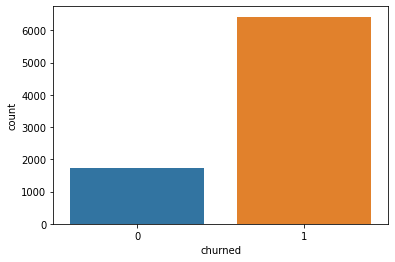

In [161]:
# Visualize the count of customer churn::
sns.countplot(df['churned'])

In [172]:
# What is the percentage of customer that are leaving:
num_reteined = df[df['churned'] == False].shape[0]
num_churned = df[df['churned'] == True].shape[0]

print(num_reteined / (num_reteined + num_churned) * 100, '% customers stayed with the company.')
print(num_churned / (num_reteined + num_churned) * 100, '% customers churned.')

78.65980644370943 % customers stayed with the company.
21.34019355629058 % customers churned.


In [173]:
mrr_reteined = np.where(df['churned'] == False, df['mrr'],0).sum()
mrr_churned = np.where(df['churned'] == True, df['mrr'],0).sum()

print(mrr_reteined / (mrr_reteined + mrr_churned) * 100, '% of MRR stayed with the company.')
print(mrr_churned / (mrr_reteined + mrr_churned) * 100, '% of MRR churned.')

77.09008638709751 % of MRR stayed with the company.
22.909913612902496 % of MRR churned.


array([<AxesSubplot:title={'center':'subscription_length_36_mths'}>,
       <AxesSubplot:title={'center':'subscription_length_12_mths'}>,
       <AxesSubplot:title={'center':'subscription_length_1_mths'}>],
      dtype=object)

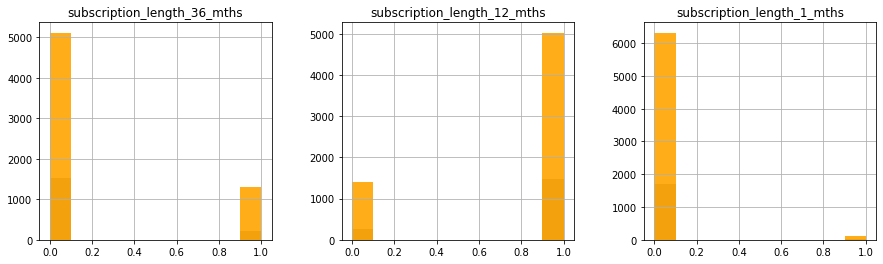

In [190]:
features = ['subscription_length_36_mths', 'subscription_length_12_mths','subscription_length_1_mths']
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
df[df['churned'] == 0][features].hist(bins=10, color="grey", alpha=0.9, ax=ax)
df[df['churned'] == 1][features].hist(bins=10, color="orange", alpha=0.9, ax=ax)


# Visualize the count of customer churn::
# sns.countplot(x ='subscription_length_36_mths', hue = "churned", data = df)
# sns.countplot(x ='subscription_length_12_mths', hue = "churned", data = df)
# sns.countplot(x ='subscription_length_1_mths', hue = "churned", data = df)
# sns.countplot(x ='billing_every_12_mths', hue = "churned", data = df)
# sns.countplot(x ='billing_every_3_mths', hue = "churned", data = df)
# sns.countplot(x ='billing_every_1_mths', hue = "churned", data = df)
# sns.countplot(x ='discount', hue = "churned", data = df)

<AxesSubplot:xlabel='days_retained', ylabel='mrr'>

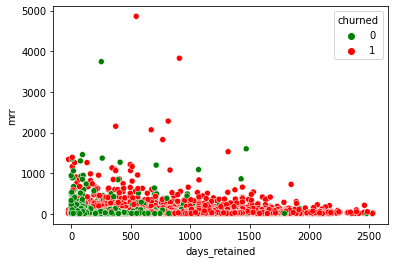

In [178]:
sns.scatterplot(data=df, x="days_retained", y="mrr", hue="churned", palette=['green','red'])

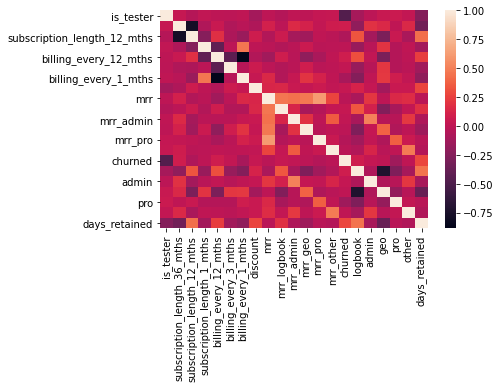

In [179]:
sns.heatmap(df.corr());

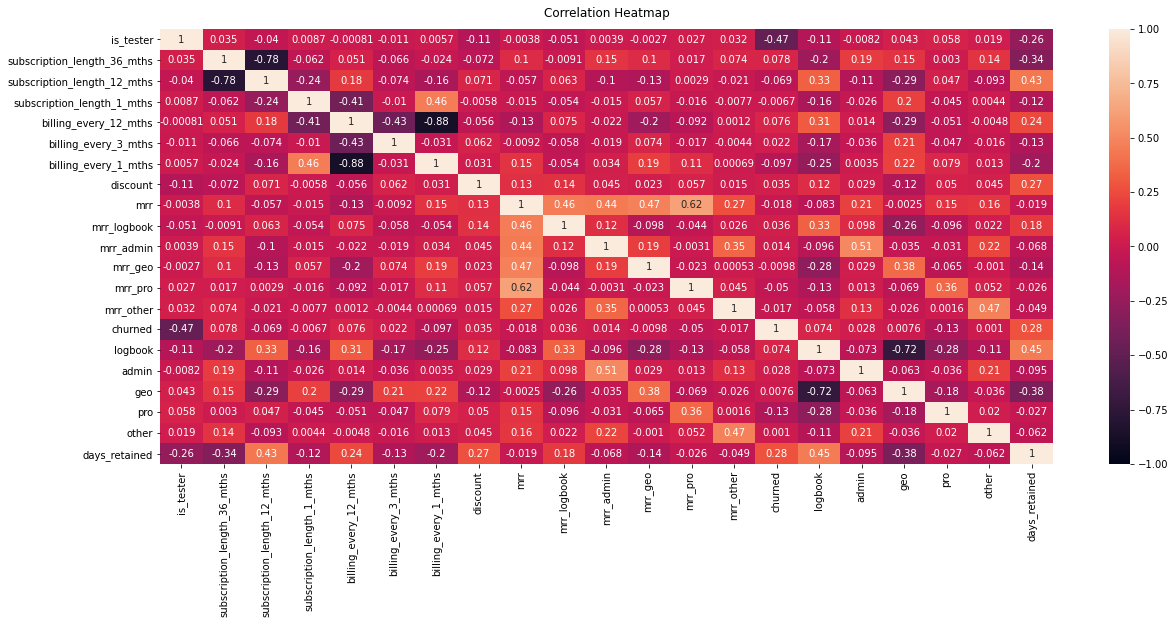

In [180]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 8))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='churned', ylabel='count'>

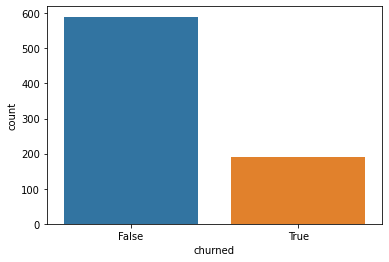

In [236]:
# Pro licenses customers:
df_pro = df[df['pro'] == 1]
sns.countplot(df_pro['churned'])

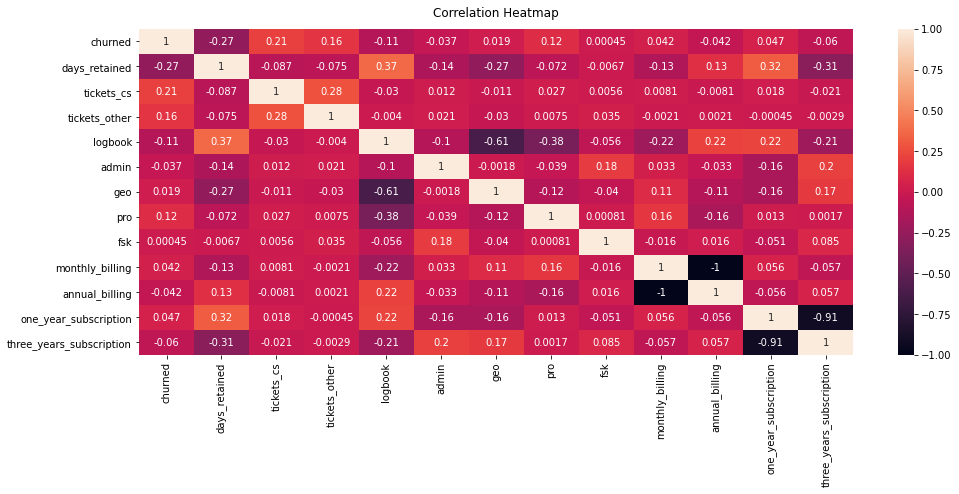

In [237]:
df_categorical = df[['churned','days_retained','tickets_cs', 'tickets_other', 
                 'logbook','admin','geo', 'pro', 'fsk', 
                    'monthly_billing', 'annual_billing', 'one_year_subscription', 'three_years_subscription']]

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_categorical.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:>

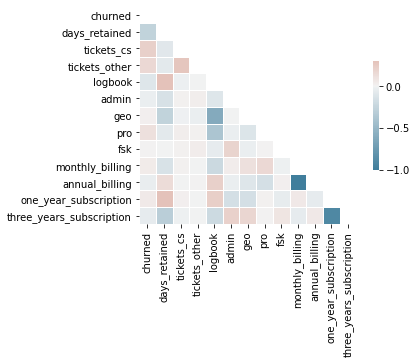

In [238]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_categorical.corr(), dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_categorical.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Cleaned / ML

In [239]:
df_cleaned = df[['churned','days_retained','tickets_cs', 'tickets_other', 
                 'mrr', 'mrr_logbook','mrr_admin','mrr_geo', 'mrr_pro', 'mrr_fsk',
                'trips_development_abs', 'distance_development_pct']]
df_cleaned.head()

,churned,days_retained,tickets_cs,tickets_other,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
0,False,183,False,False,14.93,14.93,0.0,0.0,0.0,0.0,-9.0,-6.0
1,False,1190,False,False,243.27,243.27,0.0,0.0,0.0,0.0,0.0,0.0
2,False,1961,False,False,63.60,63.60,0.0,0.0,0.0,0.0,-75.0,-31.0
3,False,1390,False,False,57.24,57.24,0.0,0.0,0.0,0.0,-3.0,-120.0
4,False,945,False,False,42.93,42.93,0.0,0.0,0.0,0.0,-67.0,3.0


In [240]:
df_cleaned.describe()

,days_retained,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
count,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6.157000e+03
mean,693.104921,74.007648,40.519227,5.249550,13.055561,13.820758,0.911062,-0.394023,-7.063175e+02
std,472.084943,157.409433,85.761643,36.434672,67.938669,86.677264,15.735061,174.597745,4.711192e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4394.000000,-3.651756e+06
25%,307.000000,19.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,584.000000,37.810000,19.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,980.000000,71.550000,42.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,2406.000000,5344.000000,2035.200000,1461.600000,3057.300000,3554.080000,855.000000,10540.000000,1.000000e+02


In [241]:
# Convert all of the non-numeric columns to numeric:
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == np.number:
        df_cleaned[column] = df_cleaned[column].astype(np.int64)
        
    df_cleaned[column] = LabelEncoder().fit_transform(df_cleaned[column])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [242]:
df_cleaned.describe()

,churned,days_retained,tickets_cs,tickets_other,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
count,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000
mean,0.138541,597.339938,0.006984,0.003898,59.945590,27.453468,3.464350,6.509014,6.860971,0.375670,251.211467,240.765633
std,0.345495,373.770206,0.083284,0.062317,72.583483,38.562557,17.119859,20.184814,24.294513,3.664054,52.868569,41.587986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,283.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,251.000000,244.000000
50%,0.000000,528.000000,0.000000,0.000000,34.000000,12.000000,0.000000,0.000000,0.000000,0.000000,251.000000,244.000000
75%,0.000000,853.000000,0.000000,0.000000,68.000000,35.000000,0.000000,0.000000,0.000000,0.000000,251.000000,244.000000
max,1.000000,1466.000000,1.000000,1.000000,435.000000,247.000000,161.000000,161.000000,186.000000,60.000000,497.000000,342.000000


In [243]:
df_cleaned

,churned,days_retained,tickets_cs,tickets_other,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
0,0,167,0,0,11,7,0,0,0,0,242,238
1,0,1023,0,0,227,156,0,0,0,0,251,244
2,0,1409,0,0,60,55,0,0,0,0,177,213
3,0,1149,0,0,54,49,0,0,0,0,248,130
4,0,841,0,0,39,35,0,0,0,0,184,247
...,...,...,...,...,...,...,...,...,...,...,...,...
6152,0,669,0,0,52,7,0,0,33,0,251,244
6153,0,647,0,0,87,78,0,0,0,0,194,241
6154,0,995,0,0,68,62,0,0,0,0,330,253
6155,1,418,0,0,40,0,0,0,34,0,251,244


In [259]:
# Can be removed later, only for testing:
# df_churned = df_cleaned[df_cleaned['churned'] == True]
df_piotr_test = df_cleaned.iloc[:11]
# df_piotr_test = df_cleaned.iloc[[3]]
# df_churned
df_piotr_test

,churned,days_retained,tickets_cs,tickets_other,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
0,0,167,0,0,11,7,0,0,0,0,242,238
1,0,1023,0,0,227,156,0,0,0,0,251,244
2,0,1409,0,0,60,55,0,0,0,0,177,213
3,0,1149,0,0,54,49,0,0,0,0,248,130
4,0,841,0,0,39,35,0,0,0,0,184,247
5,1,11,0,0,9,0,0,4,0,0,251,244
6,0,516,0,0,12,8,0,0,0,0,251,244
7,0,841,0,0,10,6,0,0,0,0,217,241
8,1,39,1,1,19,0,0,0,15,0,247,15
9,0,859,0,0,51,46,0,0,0,0,251,244


In [157]:
# Can be removed later, only for testing:
# df_cleaned = df_cleaned.merge(df_piotr_test, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
# df_cleaned = df_cleaned.iloc[: , :-1]

In [244]:
# Split features and target
X = df_cleaned.drop('churned', axis=1)  # Features data set
y = df_cleaned['churned']  # Target data set

In [245]:
# Scaled the data
X = StandardScaler().fit_transform(X)

In [246]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
y_train

4176    0
911     0
2886    0
47      0
2486    0
       ..
3772    0
5191    0
5226    1
5390    0
860     0
Name: churned, Length: 4925, dtype: int64

In [248]:
# Create the model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [249]:
# Create the predictions on the test data
predictions = model.predict(X_test)

print(predictions)

[0 0 0 ... 0 0 0]


In [250]:
# Check the precision, recall, f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1061
           1       0.83      0.11      0.20       171

    accuracy                           0.87      1232
   macro avg       0.85      0.55      0.56      1232
weighted avg       0.87      0.87      0.83      1232



In [251]:
cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

0.872177487419161

In [252]:
y.value_counts(normalize=True)

0    0.861459
1    0.138541
Name: churned, dtype: float64

In [253]:
df_pred = pd.DataFrame(model.predict(X_test))
# df_pred[df_pred[0] == 1]
df_pred.shape

(1232, 1)

In [254]:
df_X_test = pd.DataFrame(X_test)
df_y_test = pd.DataFrame(y_test)
# df_out = pd.merge(df_X_test, y_test,  left_index=True, right_index=True)
df_out = pd.merge(df_X_test, df_pred, how='left', left_index=True, right_index=True)
df_out = pd.merge(df_out, df_y_test, how='left', left_index=True, right_index=True)



In [257]:
df_out

,0_x,1,2,3,4,5,6,7,8,9,10,0_y,churned
0,-0.688554,-0.083863,-0.062556,0.731003,0.766260,-0.202375,1.262982,-0.282431,-0.102537,-0.514742,0.438488,0,NaN
1,-0.825012,-0.083863,-0.062556,3.293777,-0.711978,8.384842,-0.322497,-0.282431,11.634053,-0.004000,0.077778,0,NaN
2,0.651951,-0.083863,-0.062556,-0.440158,-0.089562,-0.202375,-0.322497,-0.282431,-0.102537,-0.004000,0.077778,0,NaN
3,1.395784,-0.083863,-0.062556,0.110977,0.895930,-0.202375,-0.322497,-0.282431,-0.102537,-1.819971,-0.306980,0,NaN
4,-1.076524,-0.083863,-0.062556,2.398184,3.411527,-0.202375,-0.322497,-0.282431,-0.102537,0.468909,-0.451264,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,0.558303,-0.083863,-0.062556,0.000750,-0.167364,-0.202375,0.668427,-0.282431,-0.102537,-0.004000,0.077778,0,NaN
1228,-0.934714,-0.083863,-0.062556,3.376447,3.618999,4.412524,-0.322497,-0.282431,-0.102537,2.379462,0.799199,0,NaN
1229,-0.070477,-0.083863,-0.062556,-0.440158,-0.089562,-0.202375,-0.322497,-0.282431,-0.102537,-0.004000,0.077778,0,NaN
1230,-1.044416,-0.083863,-0.062556,-0.329931,0.117910,-0.202375,-0.322497,-0.282431,-0.102537,-0.325578,0.270157,0,NaN


In [211]:
# Can be removed later, testing only:
df_churned = df_churned.iloc[: , 1:]
df_churned

,days_retained,tickets_cs,tickets_other,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
0,167,0,0,11,7,0,0,0,0,242,238
1,1023,0,0,227,156,0,0,0,0,251,244
2,1409,0,0,60,55,0,0,0,0,177,213
3,1149,0,0,54,49,0,0,0,0,248,130
4,841,0,0,39,35,0,0,0,0,184,247
5,11,0,0,9,0,0,4,0,0,251,244
6,516,0,0,12,8,0,0,0,0,251,244
7,841,0,0,10,6,0,0,0,0,217,241
8,39,1,1,19,0,0,0,15,0,247,15
9,859,0,0,51,46,0,0,0,0,251,244


In [260]:
# Can be removed later, testing only:
df_piotr_test = df_piotr_test.drop('churned', axis=1) 
predictions_2 = model.predict(df_piotr_test)

print(predictions_2)

[0 0 0 0 0 0 0 0 0 0 0]


In [262]:
pd.DataFrame(y_train)

,churned
4176,0
911,0
2886,0
47,0
2486,0
...,...
3772,0
5191,0
5226,1
5390,0


In [214]:
test = StandardScaler().fit_transform(df_churned)
test

array([[-1.03551313, -0.31622777, -0.31622777, -0.61321826, -0.58825064,
         0.        , -0.37947332, -0.31622777,  0.        ,  0.31188053,
         0.40998596],
       [ 0.83166259, -0.31622777, -0.31622777,  3.01117623,  2.79470657,
         0.        , -0.37947332, -0.31622777,  0.        ,  0.64749111,
         0.49616135],
       [ 1.67363669, -0.31622777, -0.31622777,  0.20898234,  0.50156107,
         0.        , -0.37947332, -0.31622777,  0.        , -2.11197362,
         0.05092182],
       [ 1.10650388, -0.31622777, -0.31622777,  0.10830472,  0.36533461,
         0.        , -0.37947332, -0.31622777,  0.        ,  0.53562092,
        -1.14117111],
       [ 0.43466962, -0.31622777, -0.31622777, -0.14338934,  0.04747286,
         0.        , -0.37947332, -0.31622777,  0.        , -1.85094317,
         0.53924905],
       [-1.37579282, -0.31622777, -0.31622777, -0.64677747, -0.74718152,
         0.        ,  0.31622777, -0.31622777,  0.        ,  0.64749111,
         0.496